## Case Study 1(House Prices)

Data fields
Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale

### 1.1 import some necessary librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 import and put the train and test datasets in  pandas dataframe

In [23]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

### 1.3 display the first five rows of the train dataset.

In [21]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### 1.4 display the first five rows of the test dataset.

In [24]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### 1.5 check the numbers of samples and features

In [31]:
print(test.columns,'\n',test.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### 1.6 Save the 'Id' column

In [25]:
df2=train['Id']
type(df2)

pandas.core.series.Series

### 1.7 Now drop the  'Id' colum since it's unnecessary for  the prediction process.

In [26]:
train.drop('Id',axis=1,inplace=True)

### 1.8 check again the data size after dropping the 'Id' variable

In [27]:
train.shape

(1460, 80)

## 1.9 Data Processing

### 1.9a) Check the Outliers for  train['GrLivArea'],  train['SalePrice']. And your observation?

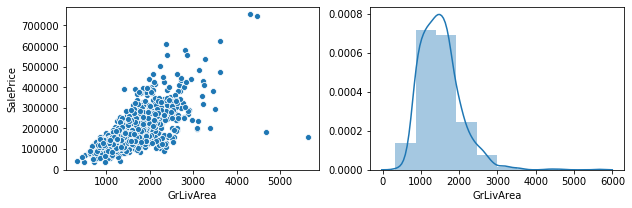

In [40]:
#train.info()
# create subplots 
fig,ax=plt.subplots(1,2,figsize=(10,3))
#create scatter plots for train['GrLivArea'],  train['SalePrice']
sns.scatterplot(data=train,x='GrLivArea',y='SalePrice',ax=ax[0])
sns.distplot(train['GrLivArea'],bins=10)

#### observation:


### 1.9 b) Deleting outliers.And your observation?

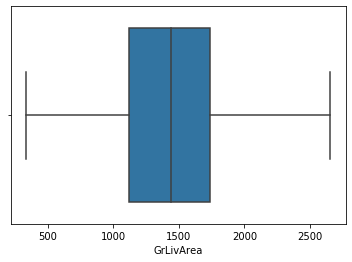

In [48]:
#Check the graphic again
#create scatterplot for train['GrLivArea'], train['SalePrice']
q1 = train [ "GrLivArea" ].quantile ( 0.25 )
q3 = train [ "GrLivArea" ].quantile ( 0.75 )
iqr = q3 - q1
train = train [ ~ ( ( train [ "GrLivArea" ] <= q1 - 1.5 * iqr ) | ( train [ "GrLivArea" ] >= ( q3 + 1.5 * iqr ) ) ) ]
sns.boxplot(train['GrLivArea'])

#### observation:
  

### 1.9 c)Check the Outliers in box plot  for train['GrLivArea'].And your observation?

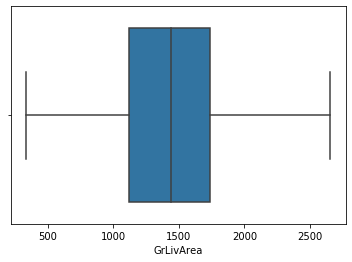

In [49]:
sns.boxplot(train['GrLivArea'])

### 1.9 d)Check Again the Outliers in box plot  for train['GrLivArea'].And your observation?

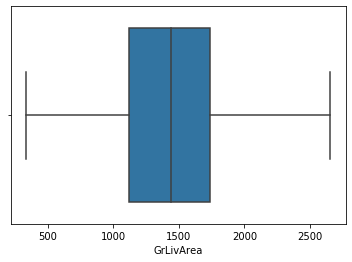

In [50]:
sns.boxplot(train['GrLivArea'])

## 1.10 Checking the skeweness for saleprice.And your observation?

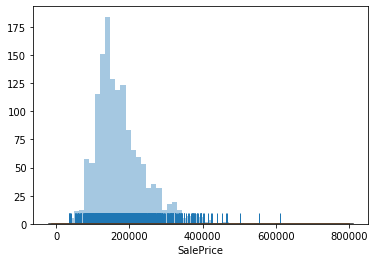

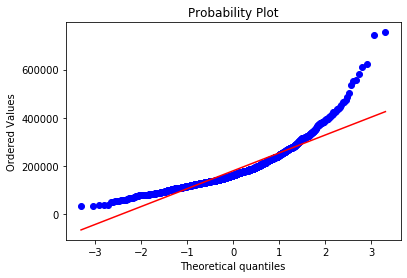

In [53]:

sns.distplot(train['SalePrice'],rug=True,kde=False)
train['SalePrice'].skew()
from scipy import stats
from scipy.stats import norm
mu,sigma=norm.fit(df['SalePrice'])
sns.distplot(df['SalePrice'],fit=norm)

fig=plt.figure()
res=stats.probplot(df['SalePrice'],plot=plt)
plt.show()



### observation:


the diversity we can observe in the probplot is due to the skewness in data

### 1.10 a) Apply Log-transformation of the target variable.And your observation?

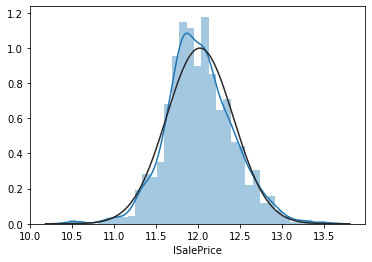

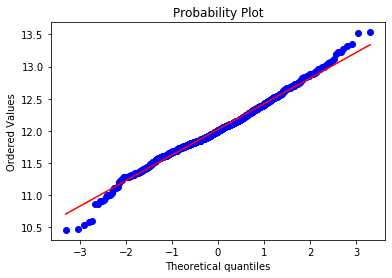

In [54]:
df['lSalePrice']=np.log(df['SalePrice'])
mu,sigma=norm.fit(df['SalePrice'])
sns.distplot(df['lSalePrice'],fit=norm)

fig=plt.figure()
res=stats.probplot(df['lSalePrice'],plot=plt)
plt.show()

#### observation:


after using log the skew is reduced as observe in probplot

### 1.11 concatenate the train and test data in the same dataframe

In [57]:
#all_data = pd.concat
all_data=pd.concat([train,test])
all_data.head()

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


In [58]:
# Drop the SalePrice
all_data.drop('SalePrice',axis=1,inplace=True)

### 1.12 Cecking the all Missing Data?

In [71]:
df.isnull().sum()
#all_data.info()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF

### 1.13 plot the missing values using barplot?

AttributeError: 'numpy.int64' object has no attribute 'plot'

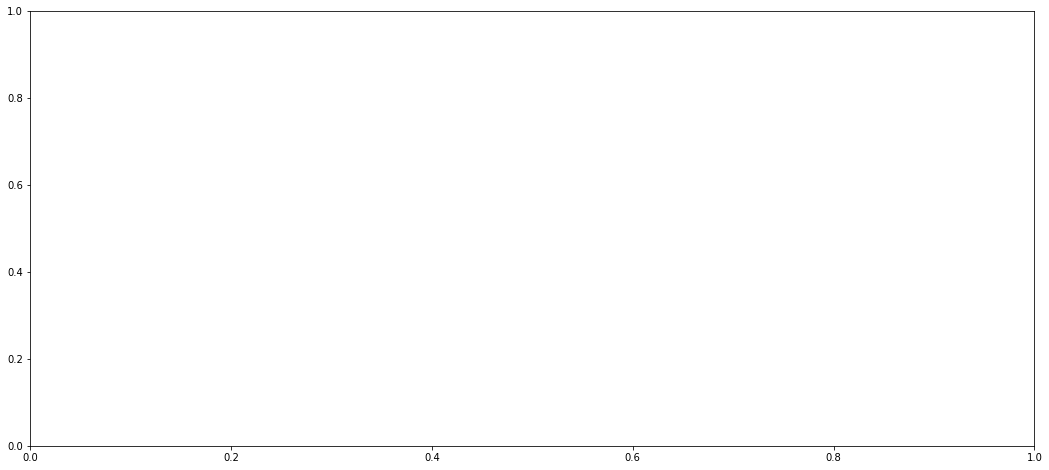

In [70]:
fig,ax=plt.subplots(figsize=(18,8))
hp_train.isna().sum().plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

### 1.14 check the Data Correlation using heatmap.And your observation?

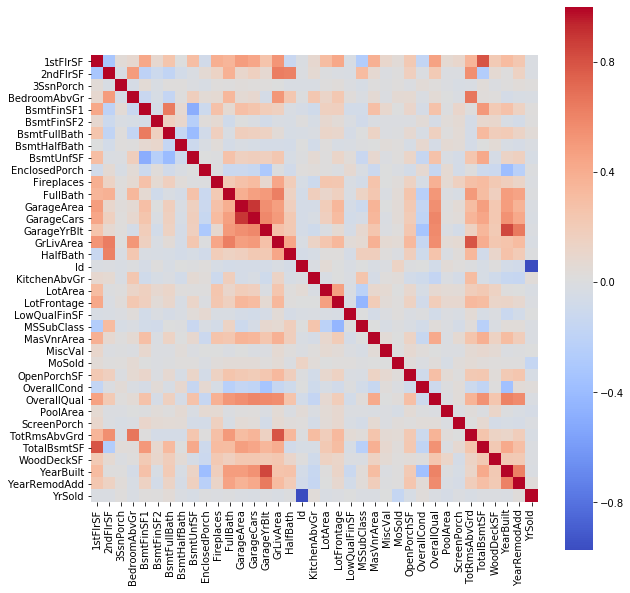

In [74]:
#Correlation map to see how features are correlated with SalePrice
a,b=plt.subplots(figsize=(10,10))
sns.heatmap(all_data.corr(),square=True,cmap='coolwarm')

#### observation:
   

#### 1.15 Imputing missing values

#### PoolQC : 
data description says NA means "No Pool". That make sense, given the huge ratio of missing value (+99%) and majority of houses have no Pool at all in general.

#### MiscFeature : 
data description says NA means "no misc feature"

#### Alley : 
data description says NA means "no alley access"

Fence : 
data description says NA means "no fence"

### 1.16 Check remaining missing values if any 

In [7]:
# FireplaceQu : data description says NA means "no fireplace"


In [8]:
#LotFrontage : Since the area of each street connected to the house property most likely have a similar
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood


In [102]:
# GarageType, GarageFinish, GarageQual and GarageCond : Replacing missing data with None


In [103]:
# GarageYrBlt, GarageArea and GarageCars : Replacing missing data with 0 (Since No garage = no cars in such garage.)


In [104]:
## BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath : missing values are likely zero for having no basement


In [105]:
#BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2 : For all these categorical basement-related features, NaN means that there is no basement.


In [106]:
#MasVnrArea and MasVnrType : NA most likely means no masonry veneer for these houses. We can fill 0 for the area and None for the type.


In [107]:
#MSZoning (The general zoning classification) : 'RL' is by far the most common value. So we can fill in missing values with 'RL'


In [92]:
#Functional : data description says NA means typical


In [93]:
#Electrical : It has one NA value. Since this feature has mostly 'SBrkr', we can set that for the missing value.


In [94]:
#KitchenQual: Only one NA value, and same as Electrical, we set 'TA' (which is the most frequent) for the missing value in KitchenQual.


In [95]:
#Exterior1st and Exterior2nd : Again Both Exterior 1 & 2 have only one missing value. We will just substitute in the most common string


In [96]:
#SaleType : Fill in again with most frequent which is "WD"


In [97]:
#MSSubClass : Na most likely means No building class. We can replace missing values with None


### 1.17 Check again remaining missing values if any.And your observation?

#### observation:
    

# 1.18 features engeneering

#### 1.18 a) Transforming some numerical variables that are really categorical

In [109]:
#MSSubClass=The building class


#Changing OverallCond into a categorical variable


#Year and month sold are transformed into categorical features.


#### 1.8b) label Encoding some categorical variables that may contain information in their ordering set

In [9]:

# process columns, apply LabelEncoder to categorical features

# shape        


### 1.19 Introduction to Test and Train


In [113]:
from sklearn.model_selection import train_test_split

### 1.20 Extract the independent variable X and dependent variable Y?

### 1.21 Split the data into train and test set(70/30)?

# The End